In [19]:
!pip install scikit-fuzzy
!pip install scipy
!pip install networkx



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\POLVO\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\POLVO\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 435.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.0 MB 762.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/2.0 MB 1.7 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/2.0 MB 2.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.7/2.0 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 8.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\POLVO\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [21]:
# Variables de entrada
ejercicio = ctrl.Antecedent(np.arange(0, 11, 1), 'ejercicio')  # horas de ejercicio a la semana
agua = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'agua')          # litros de agua al día

# Variable de salida
condicion = ctrl.Consequent(np.arange(0, 11, 1), 'condicion')   # condición física general


In [22]:
ejercicio.automf(3)  # Categorías: pobre, medio, bueno
agua.automf(3)
condicion.automf(3)


In [23]:
regla1 = ctrl.Rule(ejercicio['poor'] | agua['poor'], condicion['poor'])
regla2 = ctrl.Rule(ejercicio['average'] & agua['average'], condicion['average'])
regla3 = ctrl.Rule(ejercicio['good'] & agua['good'], condicion['good'])


In [24]:
sistema = ctrl.ControlSystem([regla1, regla2, regla3])
evaluador = ctrl.ControlSystemSimulation(sistema)


In [26]:
evaluador.input['ejercicio'] = 6    # horas por semana
evaluador.input['agua'] = 2.5       # litros por día


In [27]:
evaluador.compute()
print(f"Condición física estimada: {evaluador.output['condicion']:.2f} / 10")


Condición física estimada: 5.00 / 10


C:\Users\POLVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


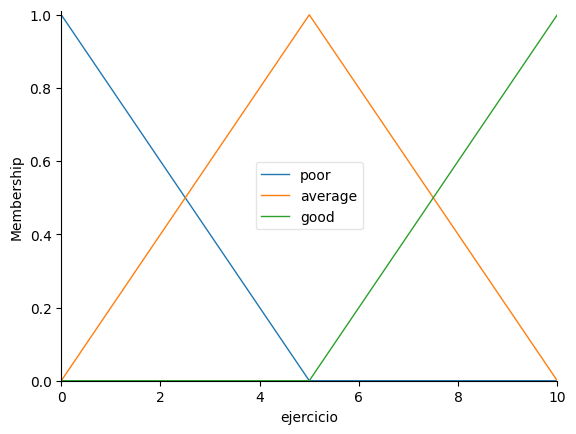

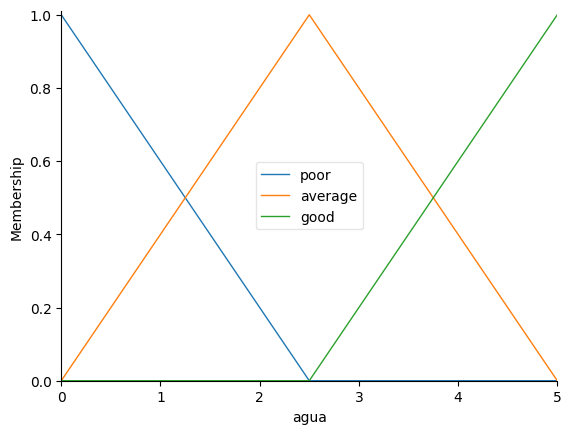

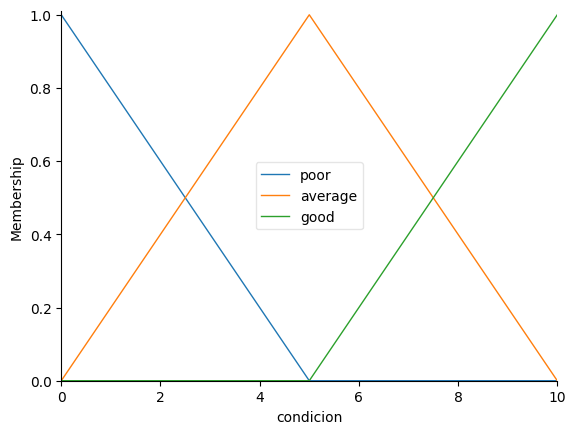

In [28]:
ejercicio.view()
agua.view()
condicion.view()
